In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib import sturges, rand_range, pdf_fondo, integral_HOM, pdf_fondo_inv, rand_TAC_gaus, funzione_fit, esegui_fit_LL

In [2]:
x_axis = np.linspace (0., np.pi, 100)
y_axis = []

for x in x_axis :
    y_axis.append (pdf_fondo (x))

# Potevo passare direttamente x_axis in pdf_fondo (x_axis) per evitare il ciclo for
# print (y_axis)

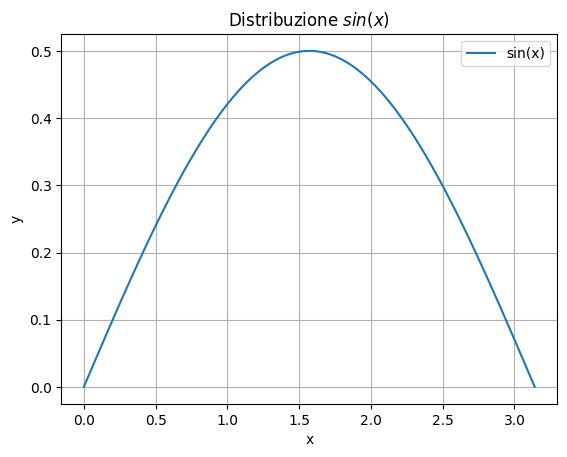

In [3]:
fig, ax = plt.subplots ()
ax.plot (x_axis, y_axis, label = 'sin(x)')
ax.set_title ('Distribuzione $sin(x)$')
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.grid ()
ax.legend ()

plt.show ()

In [4]:
# Controllo normalizzazione
value_integral, err_integral = integral_HOM (pdf_fondo, 0., np.pi, 0., 0.5, 5000)
# potevo mettere 0.5 come y_max, sarebbe stato più eff. 
print ("Valore dell'integrale: ", value_integral, "+/-", err_integral)

Valore dell'integrale:  1.0043671713526567 +/- 0.00011378056972463934


In [5]:
# Già a vista va bene il punto di massimo in 0.5 poichè è un seno con 1/2 come fattore di normalizzazione

In [6]:
N = 2000
sample_inversa = []

for _ in range (N) :
    sample_inversa.append (pdf_fondo_inv ())

In [7]:
N_eventi = 1000
mean = (np.pi)/4
sigma = (np.pi)/20
sample_gaus = []

for i in range (N_eventi) :
    sample_gaus.append (rand_TAC_gaus (mean, sigma, 1.))

sample_tot = sample_inversa + sample_gaus

Nbin = sturges (len(sample_tot))
bin_content, bin_edges = np.histogram (sample_tot, bins=Nbin, range = (min(sample_tot), max(sample_tot)))

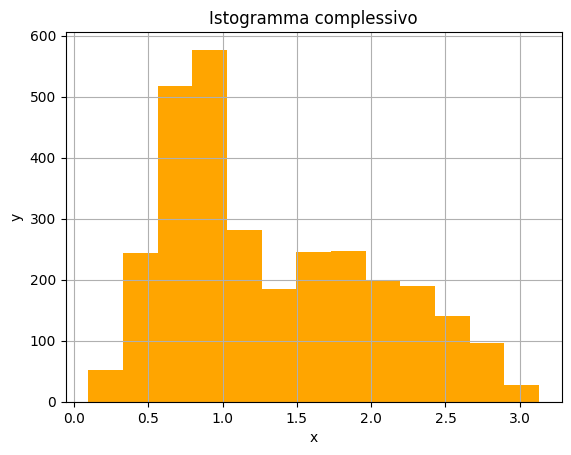

In [8]:
# Grafici
fig, ax = plt.subplots (nrows = 1, ncols = 1)

ax.hist (sample_tot, bins=bin_edges, color = 'orange')
ax.set_title ('Istogramma complessivo')
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.grid ()

plt.show ()

In [9]:
N_toy = 100           # numero di toy experiment
bias_lista = []

diz_para = {          # il dizionario mi serve per poter usare la mia funzione personalizzata esegui_fit_LL
    "mu": (np.pi)/4,
    "sigma": np.pi,
    "A": 3000.
}

for _ in range (N_toy) :
    sample_toy = []
    for i in range (N) :
        rv_inv = pdf_fondo_inv ()
        if (0 <= rv_inv <= (np.pi)/2) :    # se la rv generata con la f. inversa è tra 0 e pi/2 la aggiungo
            sample_toy.append (rv_inv)
    for i in range (N_eventi) :
        rv_TAC = rand_TAC_gaus (mean, sigma, 1.)
        if (0 <= rv_TAC <= (np.pi)/2) :    # se la rv generata con il TAC è tra 0 e pi/2 la aggiungo
            sample_toy.append (rv_TAC)
            
    Nbin = sturges (len(sample_toy))        
    bin_content, bin_edges = np.histogram (sample_toy, bins=Nbin, range = (min(sample_toy), max(sample_toy)))
    diz_result = esegui_fit_LL (bin_content,       # contenuto dei bin
        bin_edges,                                 # larghezza dei bin
        diz_para,                                  # dizionario con parametri da determinare
        funzione_fit)
    
    bias_max = (np.pi)/2
    if (diz_result["Validità"] == True and np.abs(diz_result["Value"]["mu"]) <= bias_max ) :
        bias_lista.append (diz_result["Value"]["mu"] - mean)
        '''
        Se il fit non esce lo scarto, e lo scarto anche se il valore di mu è "più grande dell'intervallo"
        '''
bias_medio = np.mean (bias_lista)
#print (bias_lista)
print ("Bias: ", bias_medio)

Bias:  0.46839784639564486
